In [1]:
# Recurrent Neural Network

In [2]:
# Part 1 - Data processing

#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [4]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
#Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
#Reshaping

#https://keras.io/layers/recurrent/#rnn
#3D tensor with shape (batch_size, timesteps, input_dim)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#Initializing the RNN
regressor = Sequential()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [9]:
#Adding the second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
#Adding the third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
#Adding the fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [12]:
#Adding the output layer
regressor.add(Dense(units = 1))

In [13]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss='mean_squared_error')

In [14]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 78s - loss: 0.0489    
Epoch 2/100
1198/1198 [==============================] - 69s - loss: 0.0068    
Epoch 3/100
1198/1198 [==============================] - 73s - loss: 0.0049    
Epoch 4/100
1198/1198 [==============================] - 66s - loss: 0.0049    
Epoch 5/100
1198/1198 [==============================] - 63s - loss: 0.0048    
Epoch 6/100
1198/1198 [==============================] - 63s - loss: 0.0051    
Epoch 7/100
1198/1198 [==============================] - 61s - loss: 0.0043    
Epoch 8/100
1198/1198 [==============================] - 60s - loss: 0.0045    
Epoch 9/100
1198/1198 [==============================] - 58s - loss: 0.0052    
Epoch 10/100
1198/1198 [==============================] - 59s - loss: 0.0041    
Epoch 11/100
1198/1198 [==============================] - 62s - loss: 0.0039    
Epoch 12/100
1198/1198 [==============================] - 59s - loss: 0.0039    
Epoch 13/100
1198/1198 [=============

In [15]:
regressor.save('rnn_model.h5')

In [16]:
# Part 3 - Making the predictions and visualizing the results

#Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [17]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [18]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

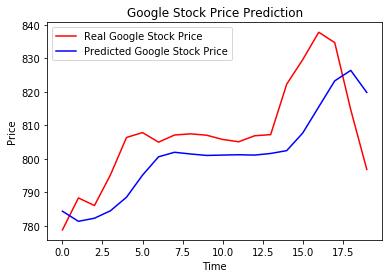

In [20]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()